In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pickle
import joblib

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222776, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222775, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12125,1.12106,1.12139,1.12127,17,2,1,-0.00005,1.121225,0.00033,1.121225,-25.518257
2020-01-01 17:05:00,1.12125,1.12127,1.12125,1.12127,1.12127,17,2,1,-0.00002,1.121260,0.00002,1.121260,-25.517939
2020-01-01 17:10:00,1.12127,1.12127,1.12123,1.12127,1.12146,17,2,1,0.00000,1.121250,0.00004,1.121260,-25.517941
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12146,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517891
2020-01-01 17:20:00,1.12144,1.12146,1.12137,1.12153,1.12146,17,2,1,-0.00002,1.121450,0.00016,1.121450,-25.517941


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12127    17    2   
2020-01-01 17:05:00  1.12125  1.12125  1.12127         1.12127    17    2   
2020-01-01 17:10:00  1.12127  1.12123  1.12127         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12146    17    2   
2020-01-01 17:20:00  1.12144  1.12137  1.12153         1.12146    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00005   1.121225  0.00033    1.121225 -25.518257  
2020-01-01 17:05:00     1  -0.00002   1.121260  0.00002    1.121260 -25.517939  
2020-01-01 17:10:00     1   0.00000   1.121250  0.00004    1.121260 -25.517941  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178220
178220
22000
22000
22555
22555


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178220, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178195, 24, 12)
(21975, 24, 12)
(22530, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178195, 1)
(21975, 1)
(22530, 1)


array([[0.433537  ],
       [0.43318605],
       [0.43218327],
       ...,
       [0.11842871],
       [0.11737537],
       [0.11872959]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.433537  , 0.43318605, 0.43218327, ..., 0.11842871, 0.11737537,
       0.11872959], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint('/content/drive/MyDrive/modelweights/EUR5minGRU.hdf5', monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 0.0238 - mae: 0.0753 - mse: 0.0238 - root_mean_squared_error: 0.1543 - mape: 3183.0029
Epoch 1: val_mse improved from inf to 0.00189, saving model to /content/drive/MyDrive/modelweights/EUR5minGRU.hdf5
463/463 [==============================] - 276s 581ms/step - loss: 0.0238 - mae: 0.0753 - mse: 0.0238 - root_mean_squared_error: 0.1543 - mape: 3183.0029 - val_loss: 0.0019 - val_mae: 0.0279 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 8794.2178
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 4.9834e-04 - mae: 0.0145 - mse: 4.9834e-04 - root_mean_squared_error: 0.0223 - mape: 827.5251
Epoch 2: val_mse improved from 0.00189 to 0.00087, saving model to /content/drive/MyDrive/modelweights/EUR5minGRU.hdf5
463/463 [==============================] - 272s 588ms/step - loss: 4.9834e-04 - mae: 0.0145 - mse: 4.9834e-04 - root_mean_squared_error: 0.0223 - mape: 827.5251 - val_loss: 8.7

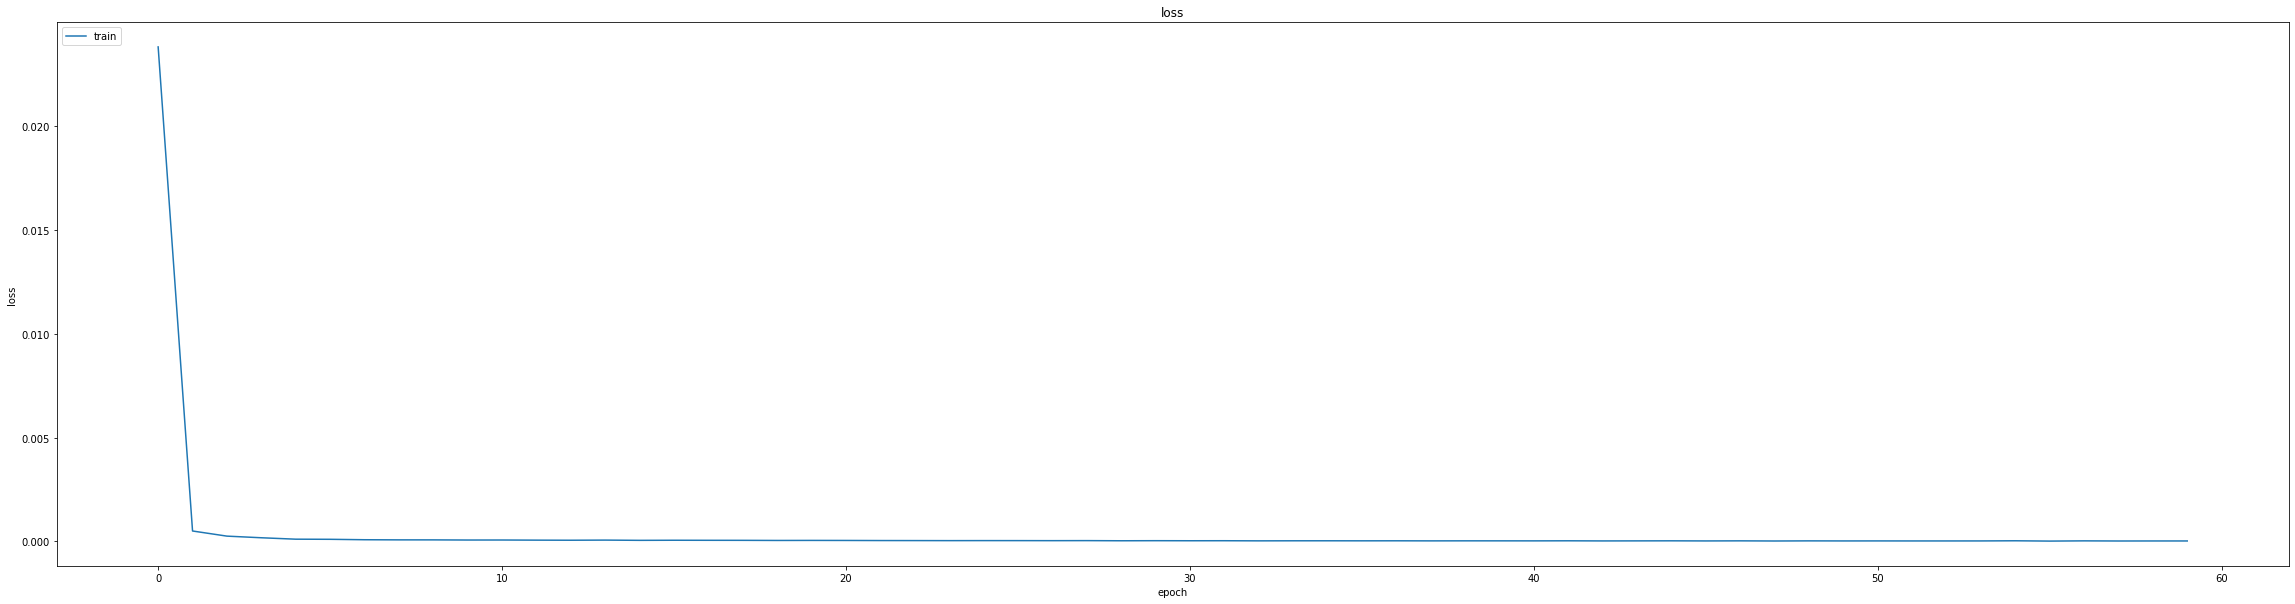

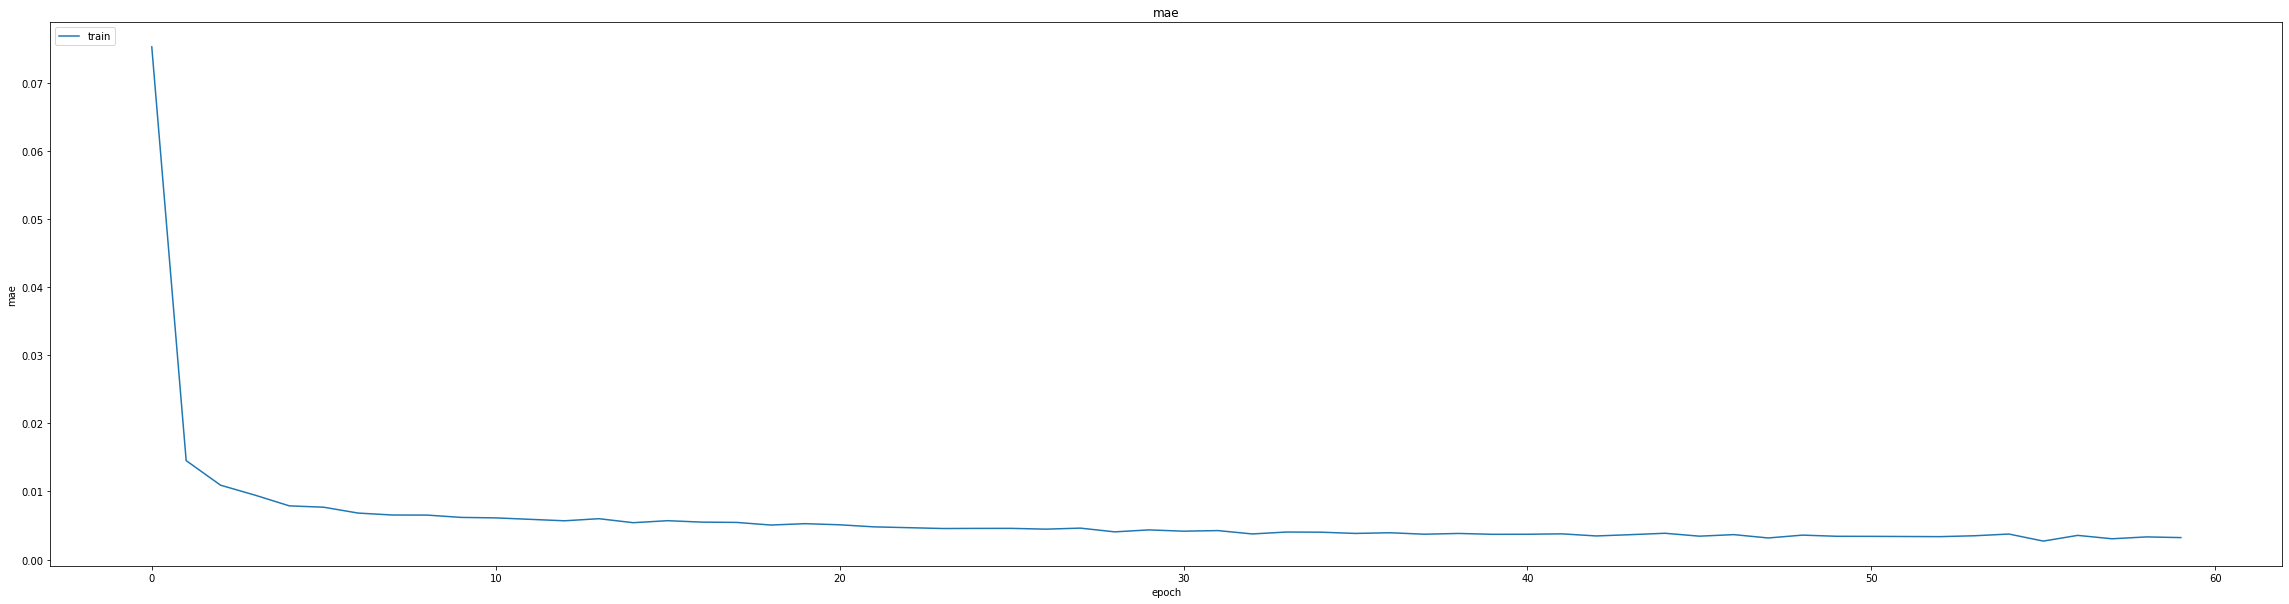

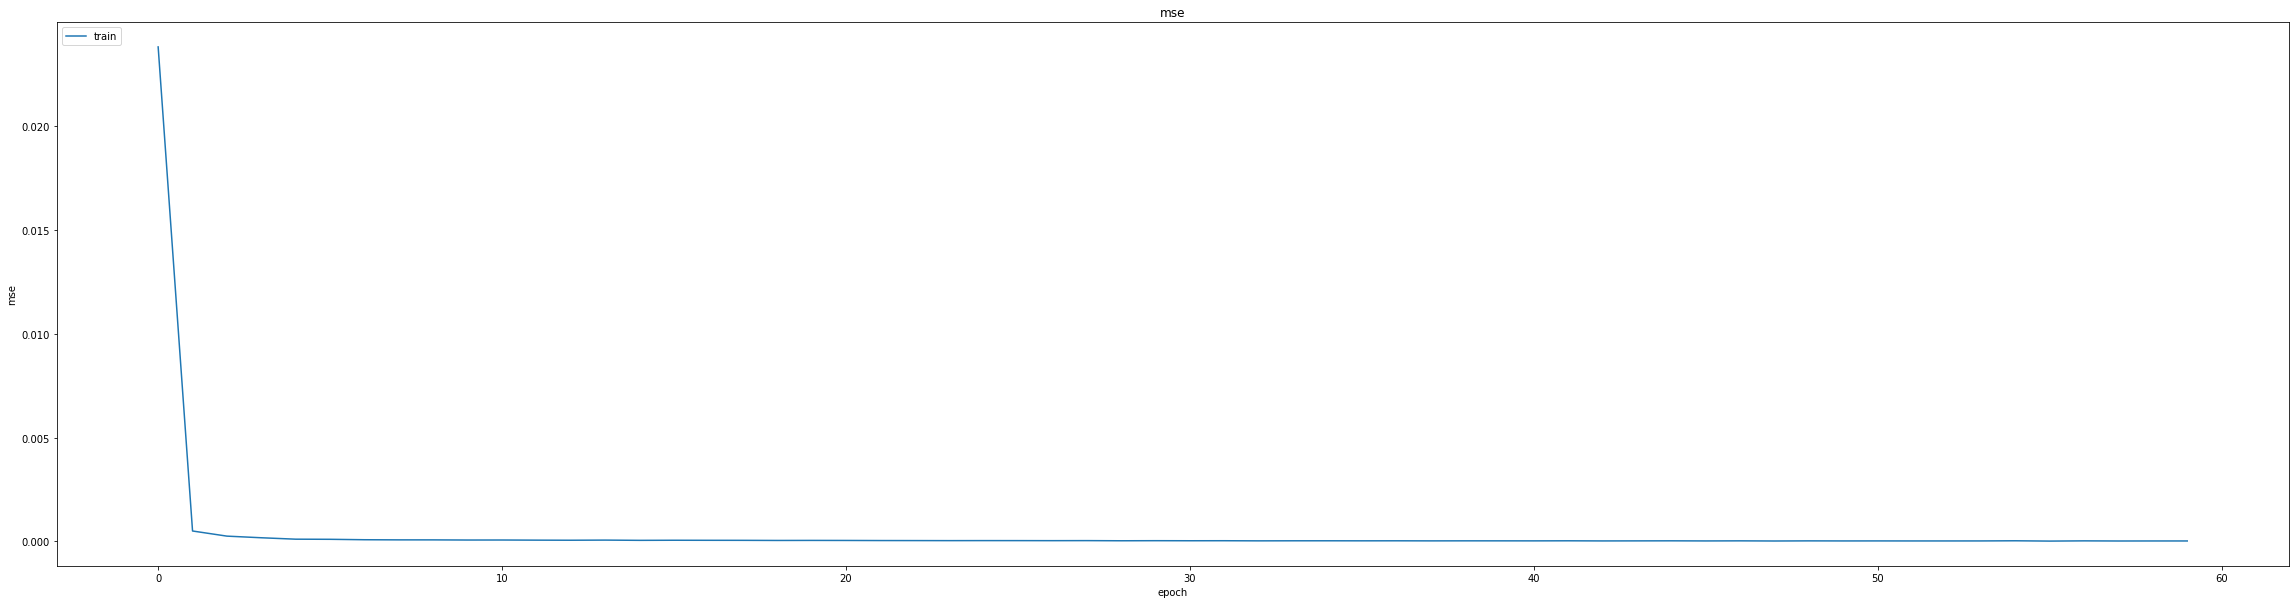

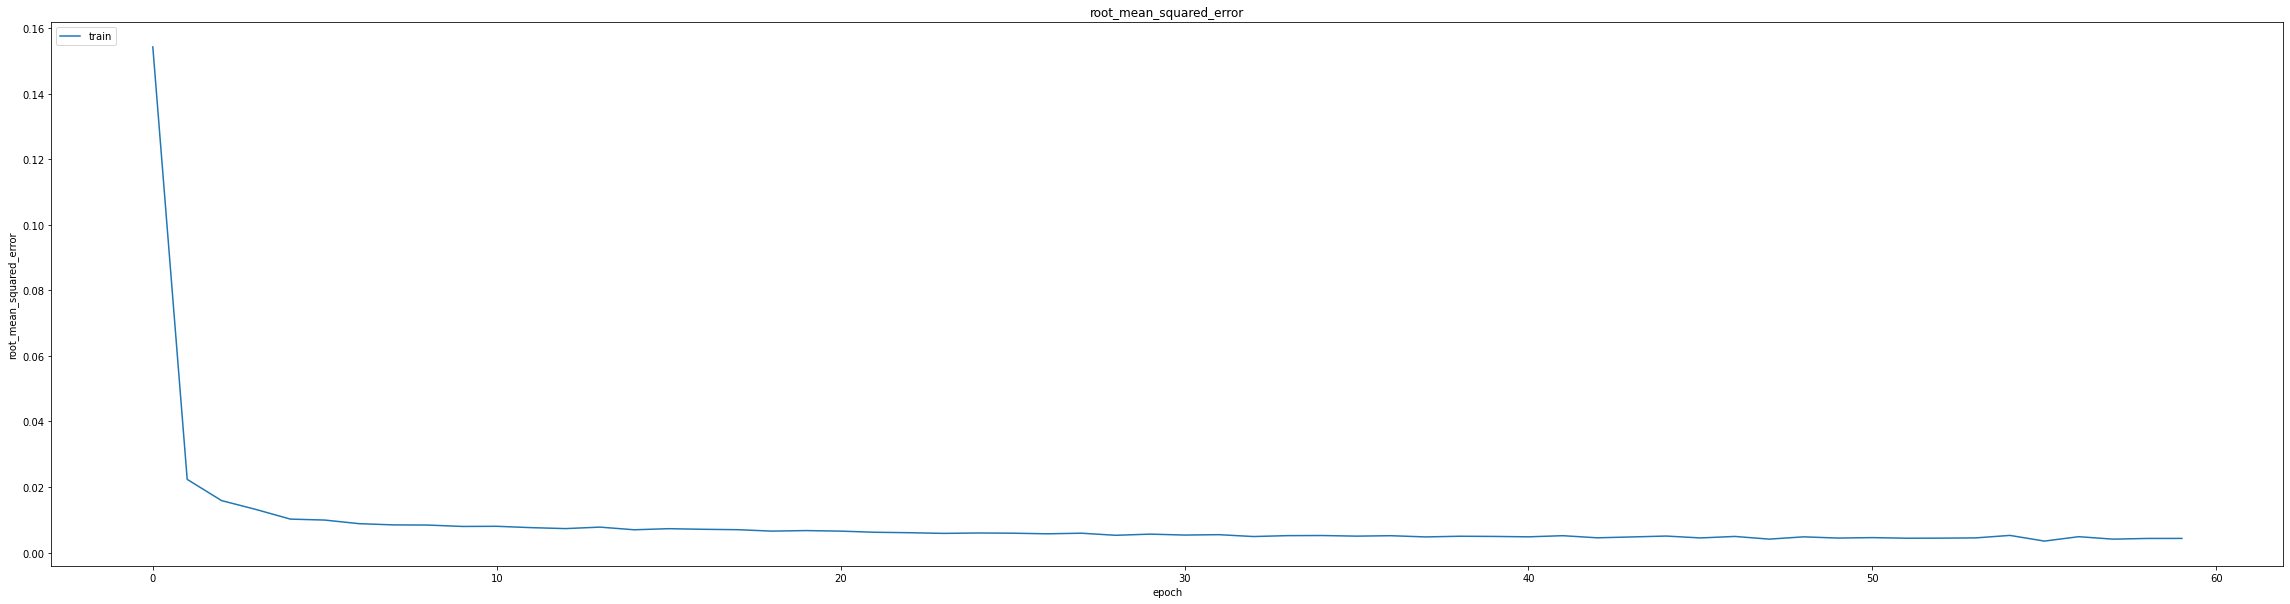

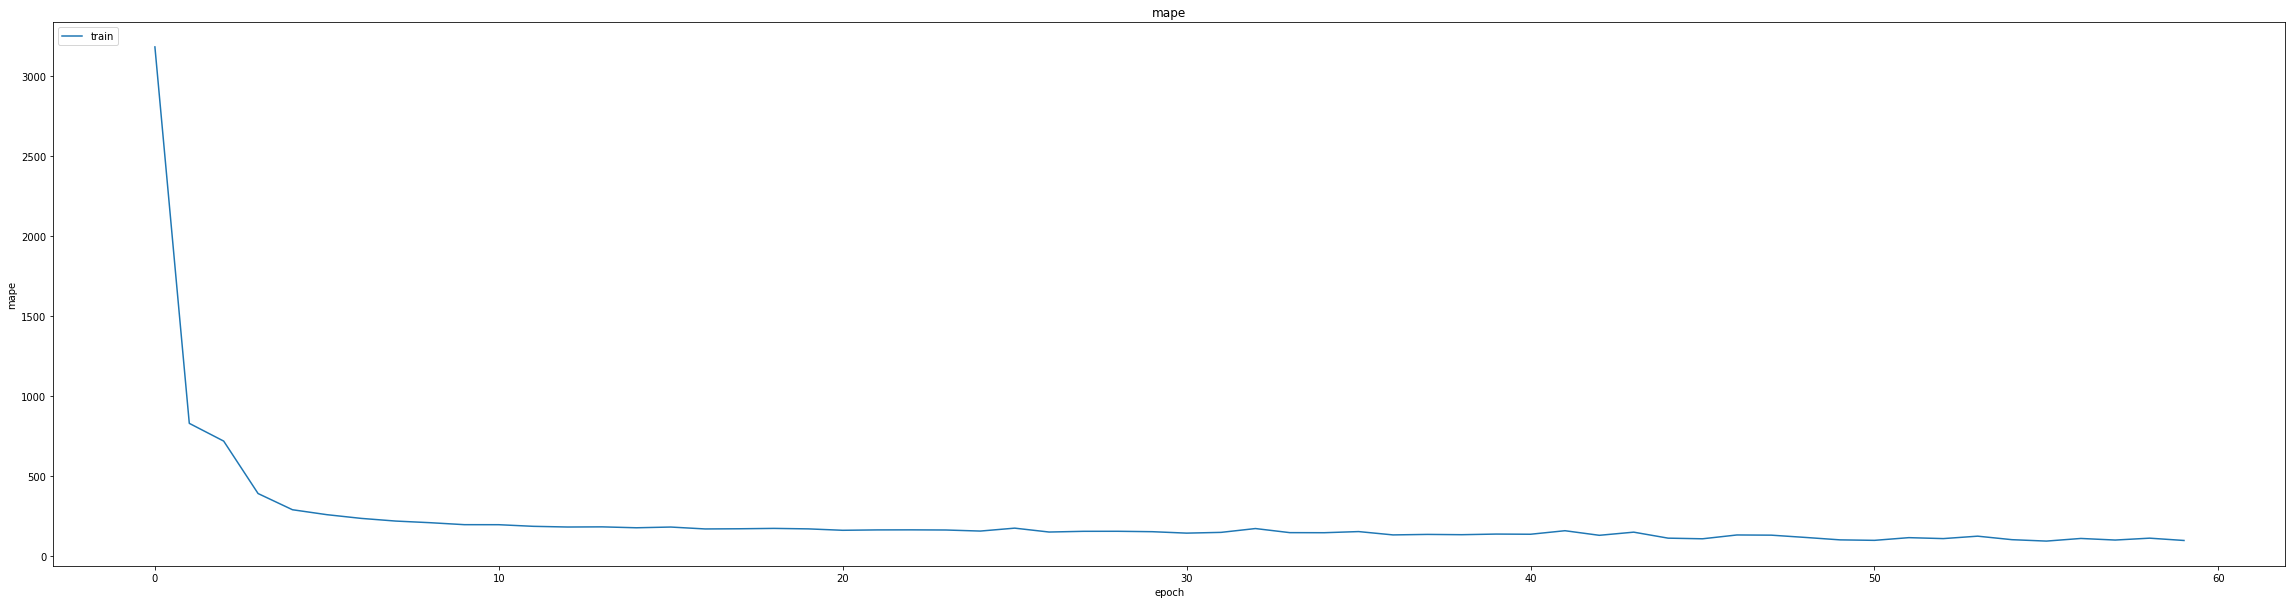

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004668253939598799
0.006756057031452656
687/687 [==============================] - 40s 57ms/step
0.9973820441125532


In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR5minGRU.hdf5")

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 1.5341e-04 - mae: 0.0045 - mse: 1.5341e-04 - root_mean_squared_error: 0.0124 - mape: 105.8450
Epoch 1: val_mse did not improve from 0.00005
463/463 [==============================] - 285s 586ms/step - loss: 1.5341e-04 - mae: 0.0045 - mse: 1.5341e-04 - root_mean_squared_error: 0.0124 - mape: 105.8450 - val_loss: 5.4239e-05 - val_mae: 0.0054 - val_mse: 5.4239e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 951.8477 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 6.3696e-06 - mae: 0.0019 - mse: 6.3696e-06 - root_mean_squared_error: 0.0025 - mape: 102.0826
Epoch 2: val_mse did not improve from 0.00005
463/463 [==============================] - 265s 573ms/step - loss: 6.3696e-06 - mae: 0.0019 - mse: 6.3696e-06 - root_mean_squared_error: 0.0025 - mape: 102.0826 - val_loss: 5.4884e-05 - val_mae: 0.0056 - val_mse: 5.4884e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 902.3431 -

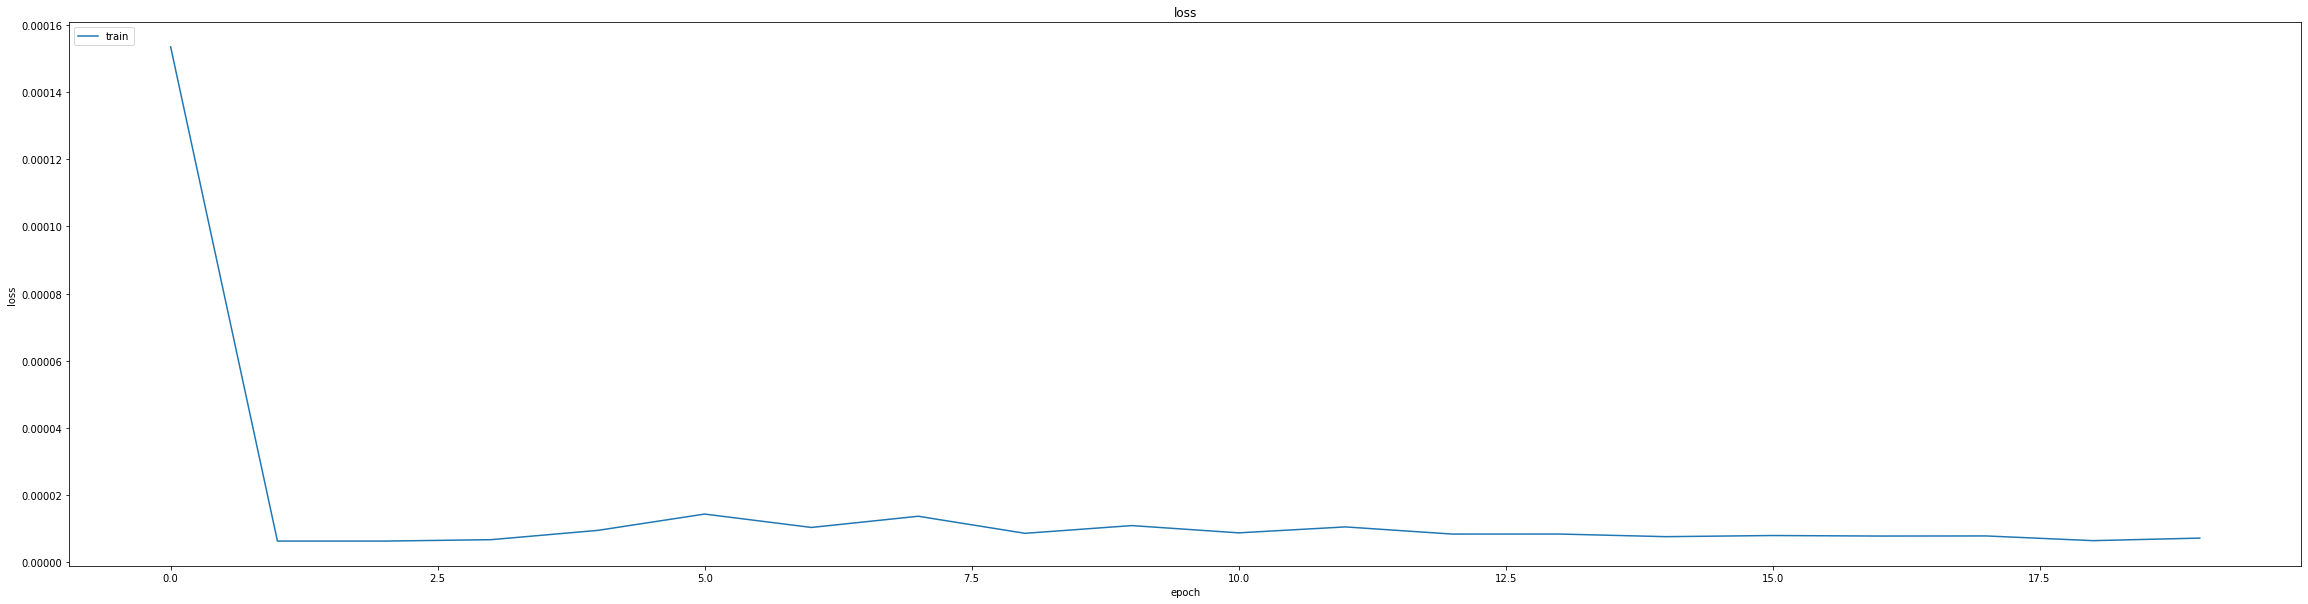

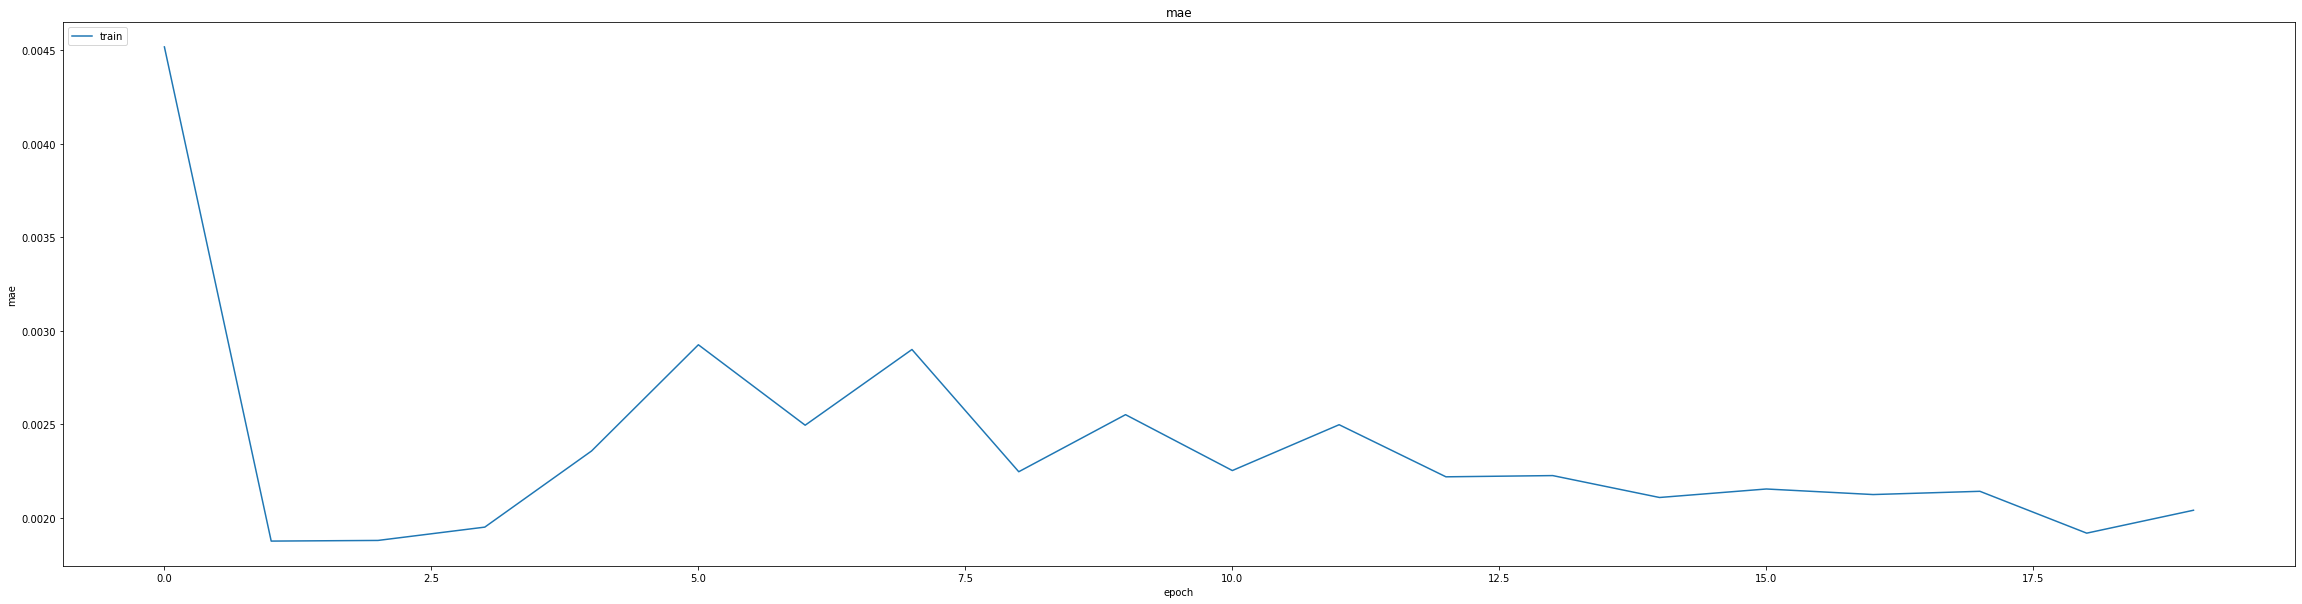

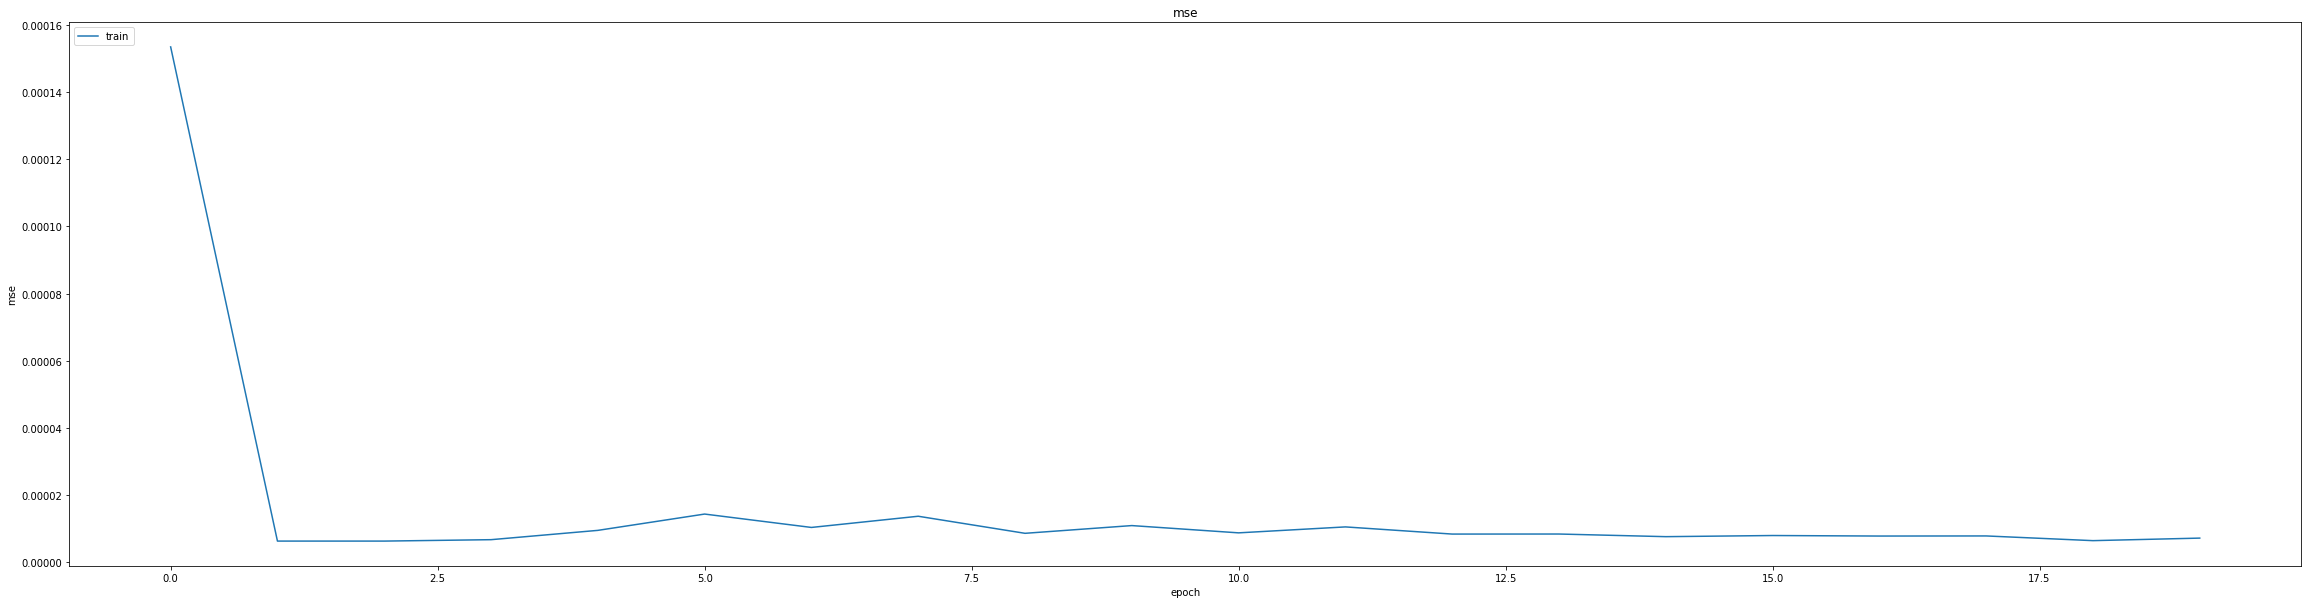

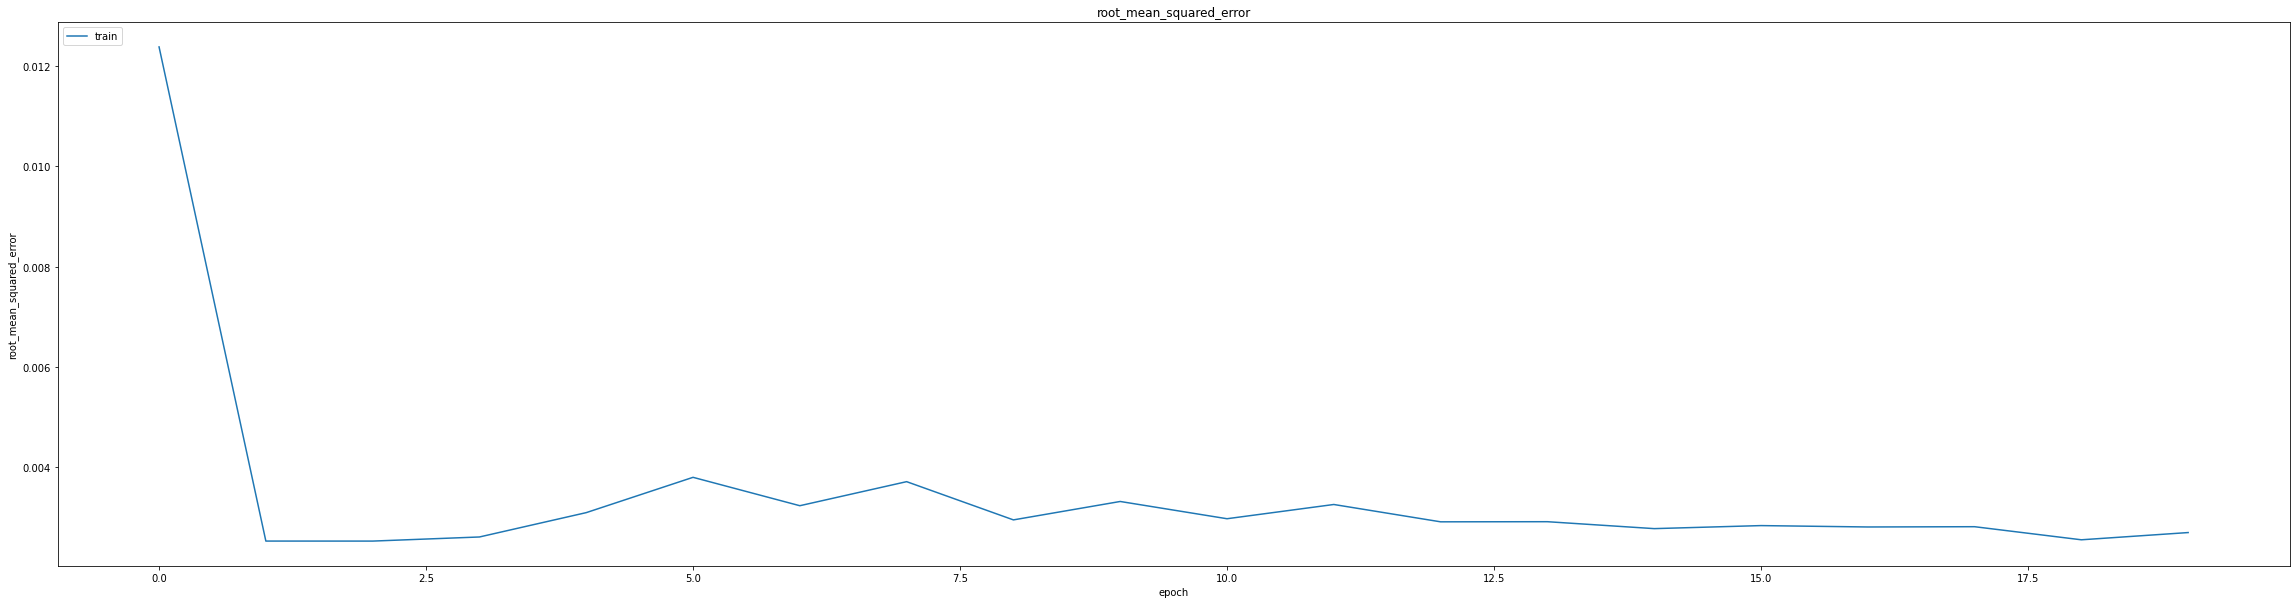

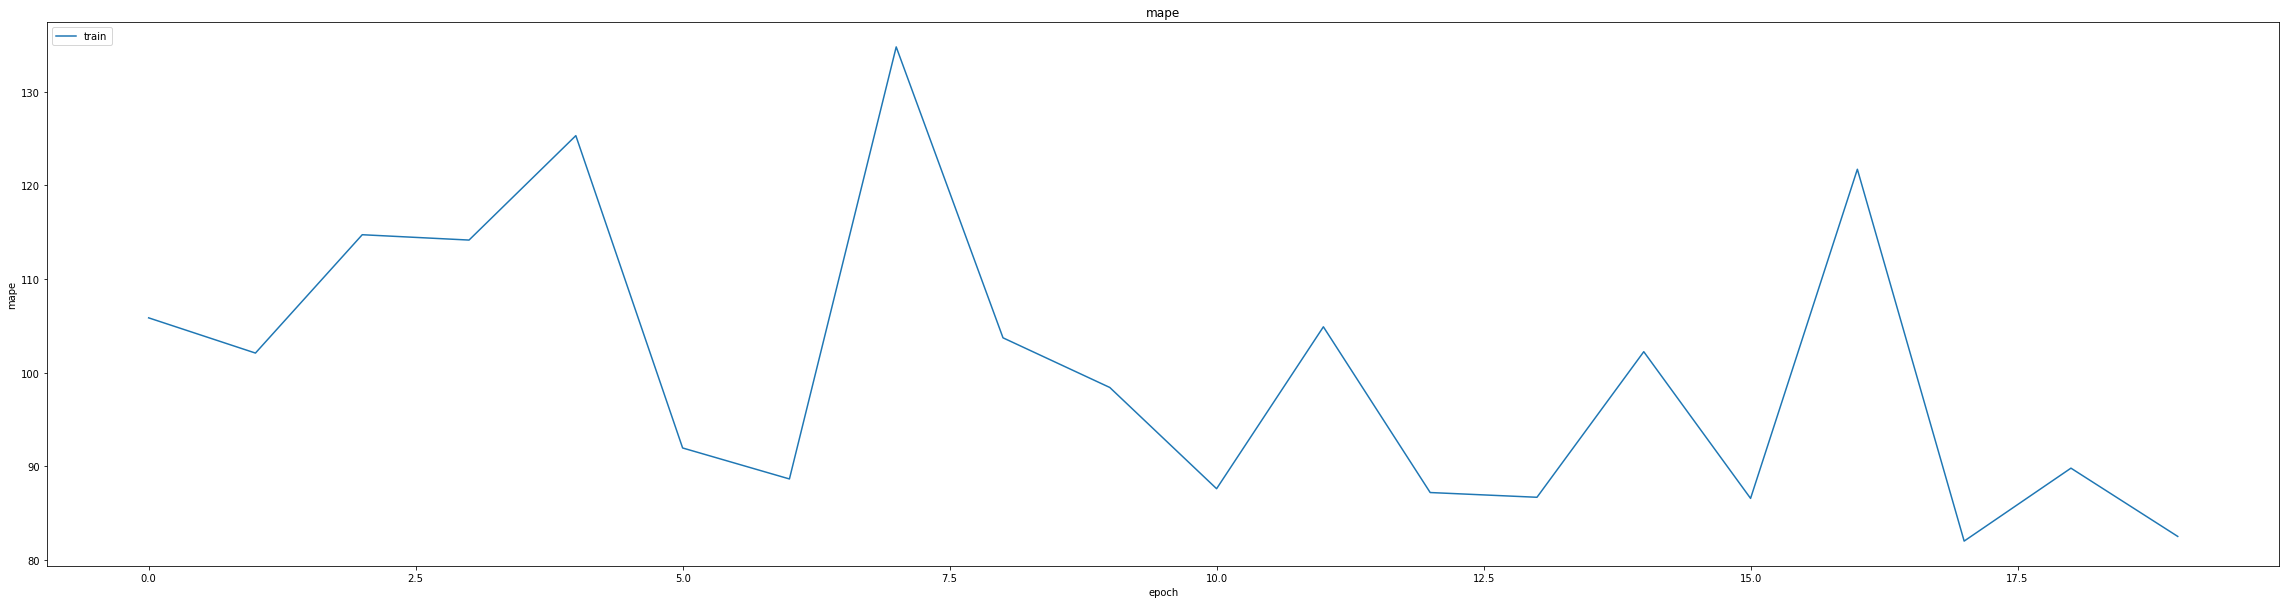

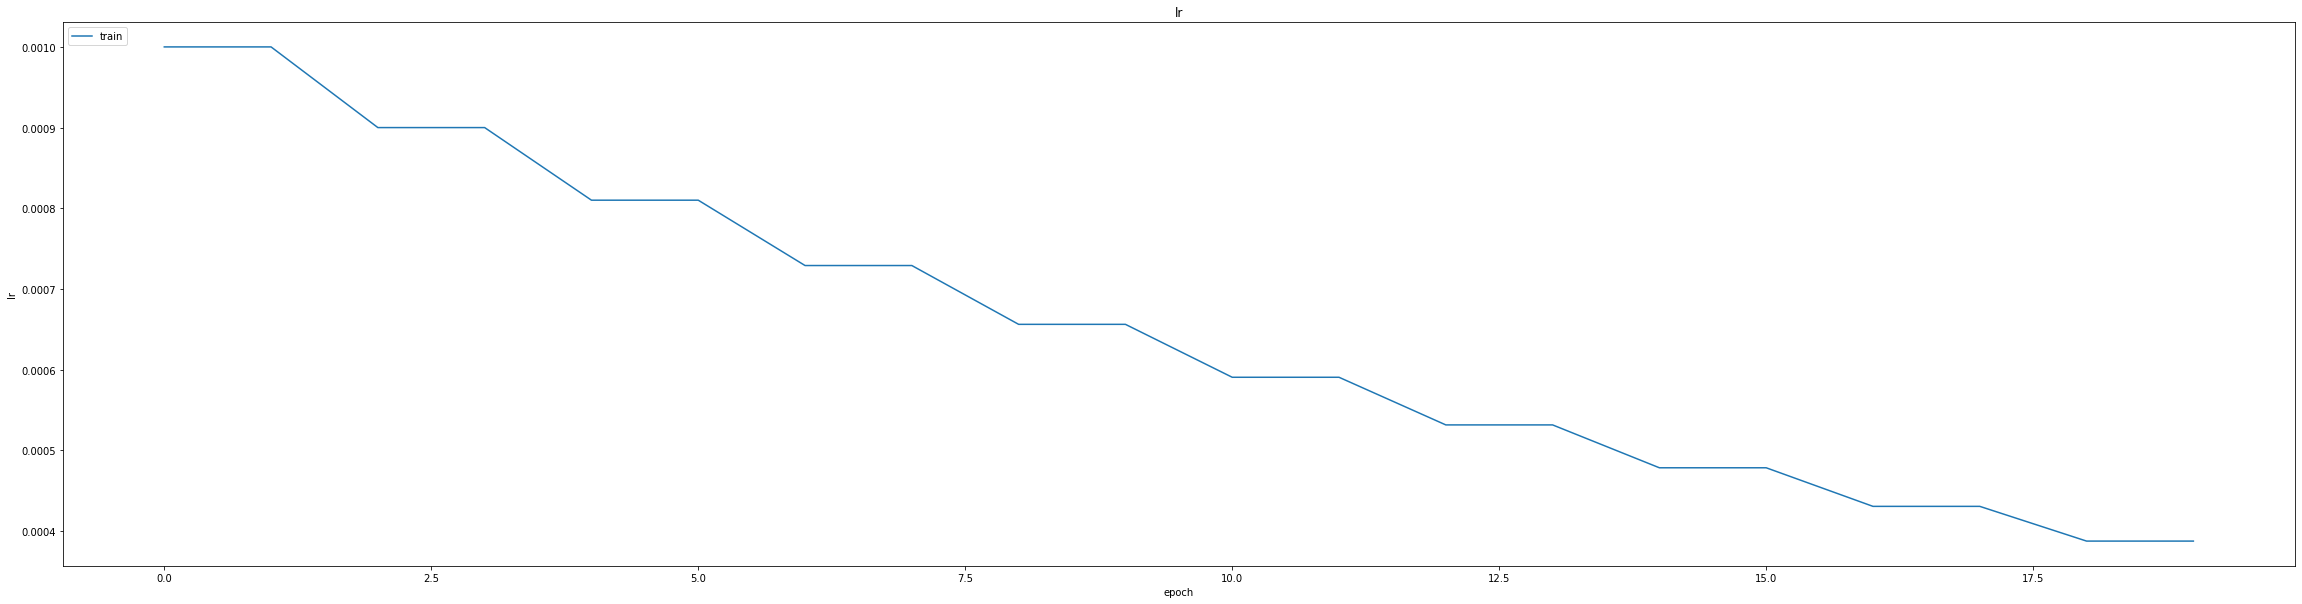

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004323309287428856
0.0063789719715714455
687/687 [==============================] - 28s 40ms/step
0.9994896793864658


687/687 [==============================] - 22s 32ms/step


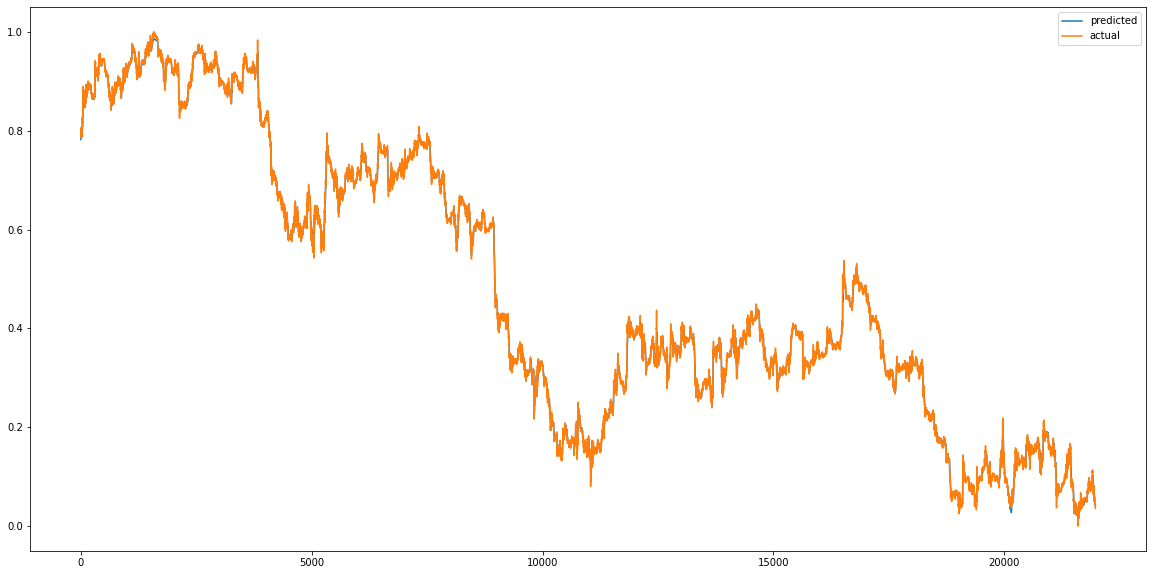

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR5minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


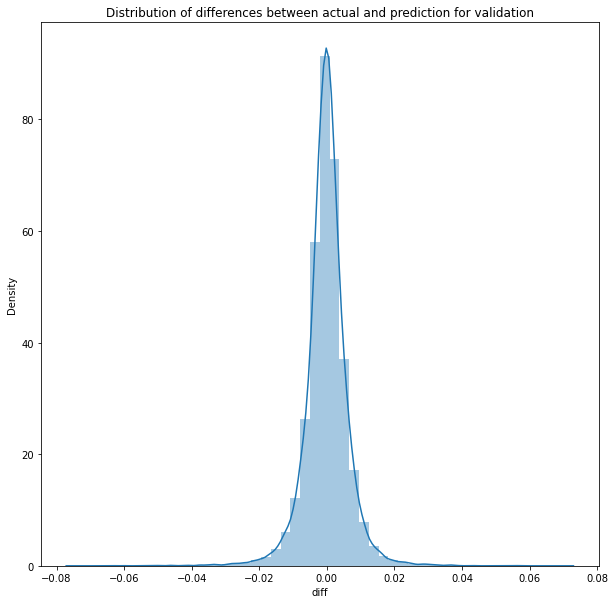

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

705/705 [==============================] - 25s 35ms/step


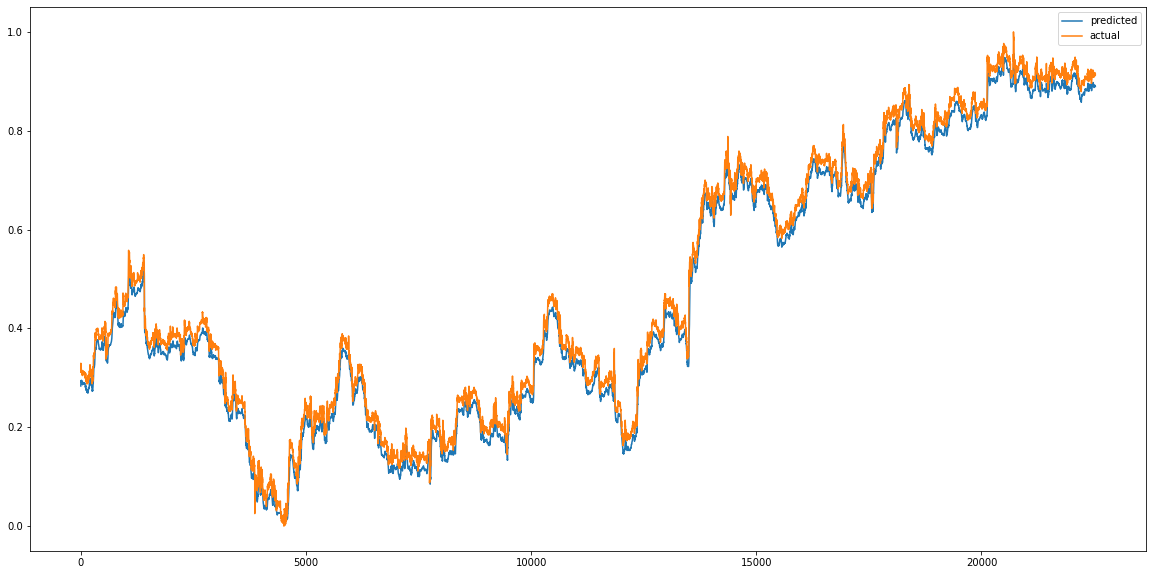

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


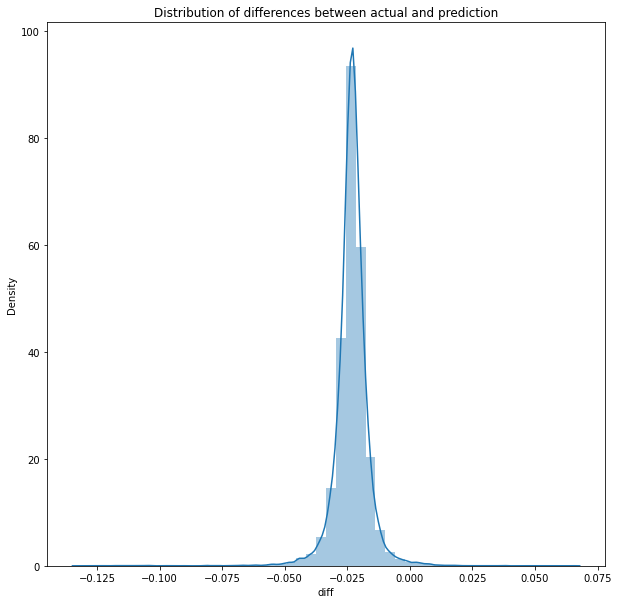

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005862894207311773
MAE :  0.023257017168111
RMSE  : 0.024213414065991958
705/705 [==============================] - 22s 32ms/step
R2_Score  : 0.9919627023993975


count    22530.000000
mean        -0.023152
std          0.007091
min         -0.131982
25%         -0.025848
50%         -0.023023
75%         -0.020177
max          0.065022
Name: diff, dtype: float64